# Cloning PyNeuralfx (You don't need to re-clone this)

In [2]:
%cd ./Pyneuralfx/frame_work

/home/fu/Documents/vocaloid_modeling/vocaloid_pyneuralfx/Pyneuralfx/frame_work


In [16]:
!python main_full_vocaloid.py

 > config: ./configs/cnn/tcn/concat_tcn.yml
> ========= Hybrid ============== <
> [Loss] --- Hybrid Trans Loss ---
> [Loss] --- Temporal L1 Loss ---
> [Loss] --- Multi-resolution STFT Loss ---
> ========= Hybrid ============== <
> [Loss] --- Hybrid Trans Loss ---
> [Loss] --- Temporal L1 Loss ---
> [Loss] --- Multi-resolution STFT Loss ---
EXP DIR:  exp/vocaloid/concat_tcn_16
 >>>>> training
> train dataset ready ...........
> valid dataset ready ...........
 [!] saver created!
 > params amount: 2,713 | trainable: 2,713 |  bs: 80  
============ start training ============
epoch: 0/10 (  0/405) | exp/vocaloid/concat_tcn_16 | t: 0.72 | loss: 4.773184 | time: 0:00:00.7 | counter: 0
pred: max:2.162272, min:-3.540941, mean:-0.033793
anno: max:0.292908, min:-0.277679, mean:0.000035
 [*] run validation...
 > validation loss: 0.305516 | counter: 0
 [!] --- best model updated ---
 [*] saving model to exp/vocaloid/concat_tcn_16, name: best
 [*] saving model to exp/vocaloid/concat_tcn_16, name: l

In [17]:
!python3 evaluation_full.py

> [Loss] --- Multi-resolution STFT Loss ---
> [Loss] --- ESR Loss ---
> [Metrics] --- Transient evaluation based on STN separation---
> [Loss] --- ESR Loss ---
> [Metrics] --- LUFS ---
> [Metrics] --- Crest Factor (Dynamics range) [dB] ---
> [Metrics] --- Rms energy (Dynamics range) [dB] ---
> [Metrics] --- Spectral Centroid ---
> exp name:  vocaloid/concat_tcn_16
> total audio clips:  5
  0%|                                                     | 0/5 [00:00<?, ?it/s]/home/fu/Documents/vocaloid_modeling/.venv/lib/python3.9/site-packages/torch/functional.py:709: UserWarning: stft with return_complex=False is deprecated. In a future pytorch release, stft will return complex tensors for all inputs, and return_complex=False will raise an error.
Note: you can still call torch.view_as_real on the complex output to recover the old return format. (Triggered internally at /pytorch/aten/src/ATen/native/SpectralOps.cpp:873.)
  return _VF.stft(  # type: ignore[attr-defined]
/home/fu/Documents/vocal

In [19]:
import librosa
import IPython.display as ipd
input, sr = librosa.load('./exp/vocaloid/concat_tcn_16/valid_gen/inp/output0_0.0_0.0_-0.5_0.0_0.0_-0.2.wav', sr=None, mono=True)
target_y, sr_x = librosa.load('./exp/vocaloid/concat_tcn_16/valid_gen/anno/output0_0.0_0.0_-0.5_0.0_0.0_-0.2.wav', sr=None, mono=True)
pred_y, sr_y = librosa.load('./exp/vocaloid/concat_tcn_16/valid_gen/pred/output0_0.0_0.0_-0.5_0.0_0.0_-0.2.wav', sr=None, mono=True)
assert sr_x == sr_y

print('Input')
ipd.display(ipd.Audio(data=input[:sr*5], rate=sr, normalize=False))
print('Target')
ipd.display(ipd.Audio(data=target_y[:sr_x*5], rate=sr_x, normalize=False))
print(f'Predict')
ipd.display(ipd.Audio(data=pred_y[:sr_y*5], rate=sr_y, normalize=False))

Input


Target


Predict


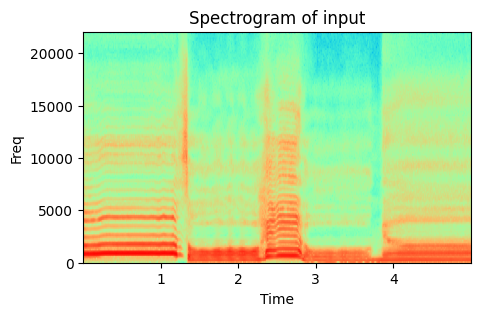

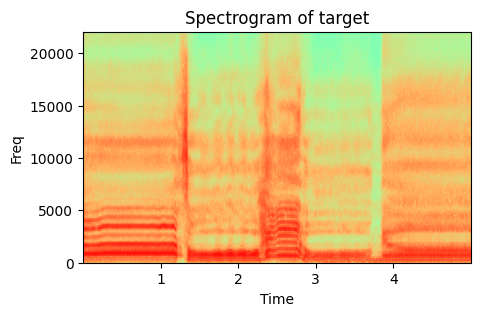

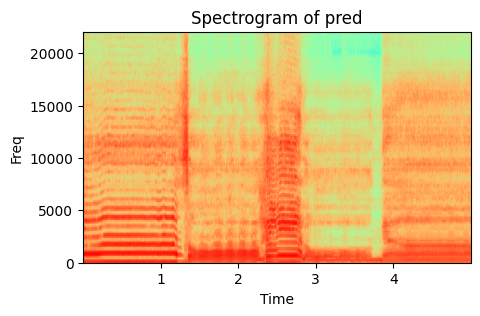

In [20]:
import matplotlib.pyplot as plt

def plot_spectralgram(audio, type='_'):
    # generate spectrogram
    plt.figure(figsize=(5, 3))
    plt.specgram(audio, Fs=44100, cmap="rainbow")
    
    # Set the title of the plot, xlabel and ylabel
    # and display using show() function
    plt.title('Spectrogram of ' + type)
    plt.xlabel("Time")
    plt.ylabel("Freq")
    plt.show()

plot_spectralgram(input[:sr*5], type='input')
plot_spectralgram(target_y[:sr_x*5], type='target')
plot_spectralgram(pred_y[:sr_y*5], type='pred')